In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [28]:
df=pd.read_csv("E:/DATA SCIENCE/jan/Instagram visits clustering.csv")
df

,User ID,Instagram visit score,Spending_rank(0 to 100)
0,0,63,24.050708
1,1,61,25.223290
2,2,104,18.528245
3,3,82,86.890232
4,4,14,31.492397
...,...,...,...
2595,2595,25,25.745908
2596,2596,52,9.275066
2597,2597,100,84.999487
2598,2598,87,20.530806


In [29]:
datasubset=df.loc[:,['Instagram visit score','Spending_rank(0 to 100)']]

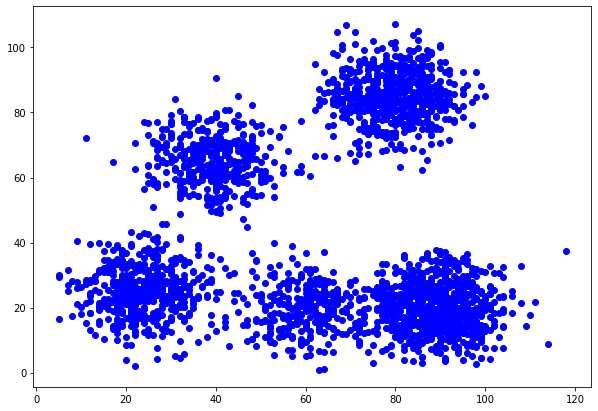

In [30]:
plt.figure(figsize=(10,7))
plt.scatter(datasubset[['Instagram visit score']],datasubset[['Spending_rank(0 to 100)']],c='blue')

In [31]:
datasubset=df.loc[:,['Instagram visit score','Spending_rank (0 to 100)']]

KeyError: "['Spending_rank (0 to 100)'] not in index"

In [32]:
from sklearn.preprocessing import normalize
scaled=normalize(datasubset)
scaled=pd.DataFrame(scaled)
scaled.head()

,0,1
0,0.934237,0.356652
1,0.924114,0.382118
2,0.984498,0.175394
3,0.686345,0.727276
4,0.406220,0.913775


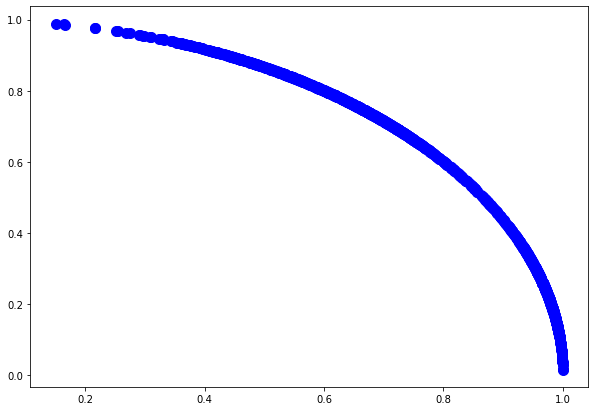

In [33]:
plt.figure(figsize=(10,7))
plt.scatter(scaled[[0]],scaled[[1]],c='blue',s=100)
plt.show()

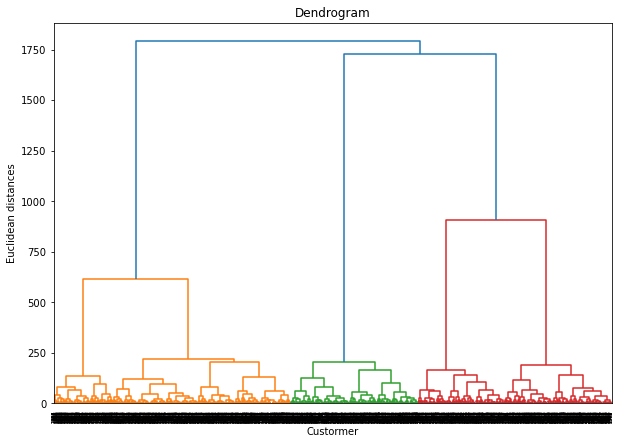

In [34]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,7))
# dendrogram=sch.denddrogram(sch.linkage(scaled,method='ward'))
dendrogram=sch.dendrogram(sch.linkage(datasubset,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Custormer')
plt.ylabel('Euclidean distances')
plt.show()
# check for latest distance vertically without crossing any horizontal line

In [35]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
cluster.fit_predict(datasubset)
# cluster.fit_predict(scaled)

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

In [36]:
# cl=cluster.fit_predict(scaled)
cl=cluster.fit_predict(datasubset)

In [37]:
from sklearn.metrics import silhouette_score

In [38]:
# silhouette_score(scaled,cl)
silhouette_score(datasubset,cl)

0.45081556212797874